In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.segmenter_factory import (
    SegmenterFactoryInterface,
    SegmenterType,
)
from segmenter_api.domain.service.segmenter import Bbox2SegmentInput
from segmenter_api.utils.image import draw_bbox

In [3]:
segmenter_factory = resolve(SegmenterFactoryInterface)
segmenter = segmenter_factory.create(SegmenterType.SAM2)

{"severity": "INFO", "timestamp": "2025-04-16_03:01:56", "message": "関数SAM2.__init__が開始"}
{"severity": "WARNING", "timestamp": "2025-04-16_03:01:56", "message": "ローカルモデルのロードに失敗しました: Reauthentication is needed. Please run `gcloud auth application-default login` to reauthenticate."}
{"severity": "WARNING", "timestamp": "2025-04-16_03:01:56", "message": "Traceback (most recent call last):\n  File \"/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/src/segmenter_api/infra/service/segmenter/sam2.py\", line 43, in _load_model\n    self.file_repository.download_to_dir(\n  File \"/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/src/segmenter_api/infra/repository/gcs.py\", line 134, in download_to_dir\n    self.download(source_paths, destination_paths, overwrite)\n  File \"/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/src/segmenter_api/infra/repository/gcs.py\", line 62, in download\n    blobs = list(bucket.list_blobs(prefix=gcs_path.blob_path))\n            ^^^^^^^^^^^^^

INFO:segmenter_api.utils.time:関数SAM2.__init__は3.4967secで処理を完了


In [4]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path).convert("RGBA")
bboxes = [
    [252.416015625, 186.8800048828125, 518.656005859375, 740.864013671875],
    [295.42401123046875, 542.2080078125, 501.2480163574219, 733.696044921875],
]

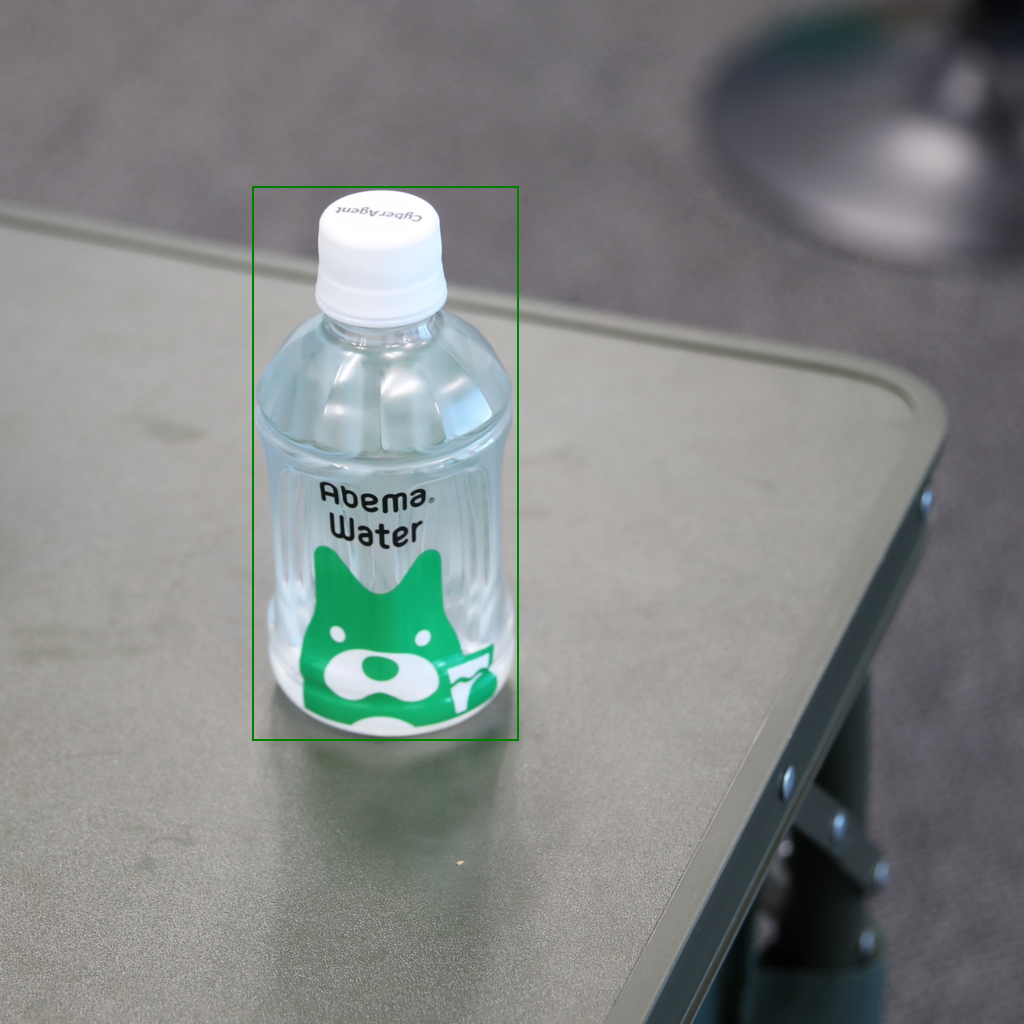

In [5]:
draw_bbox(image=image, bbox=bboxes[0])

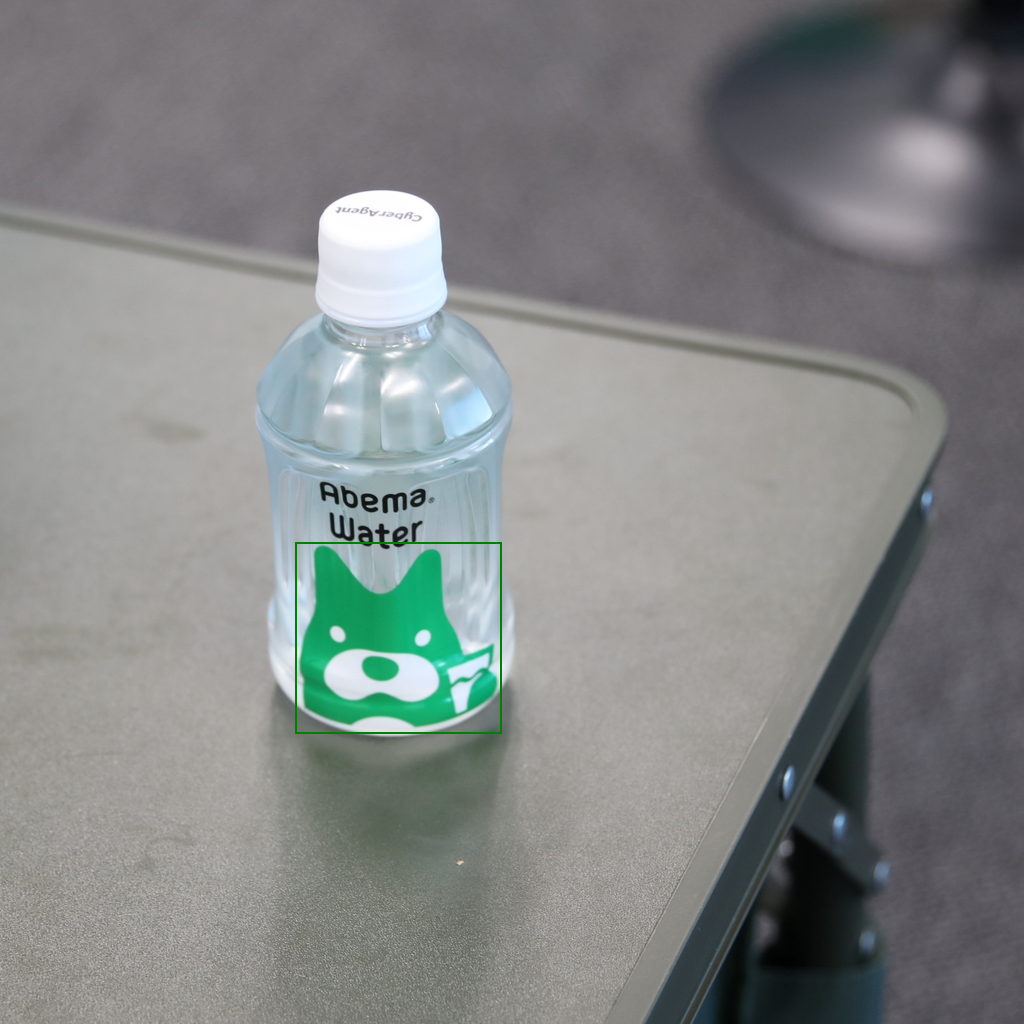

In [ ]:
draw_bbox(image=image, bbox=bboxes[1])

In [7]:
bbox2segment_output = segmenter.bbox2segment(
    bbox2segment_input=Bbox2SegmentInput(
        image=image,
        bboxes=bboxes,
    )
)

{"severity": "INFO", "timestamp": "2025-04-16_03:02:05", "message": "関数SAM2.bbox2segmentが開始"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentが開始


{"severity": "INFO", "timestamp": "2025-04-16_03:02:05", "message": "関数SAM2.bbox2segmentは0.4907secで処理を完了"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentは0.4907secで処理を完了


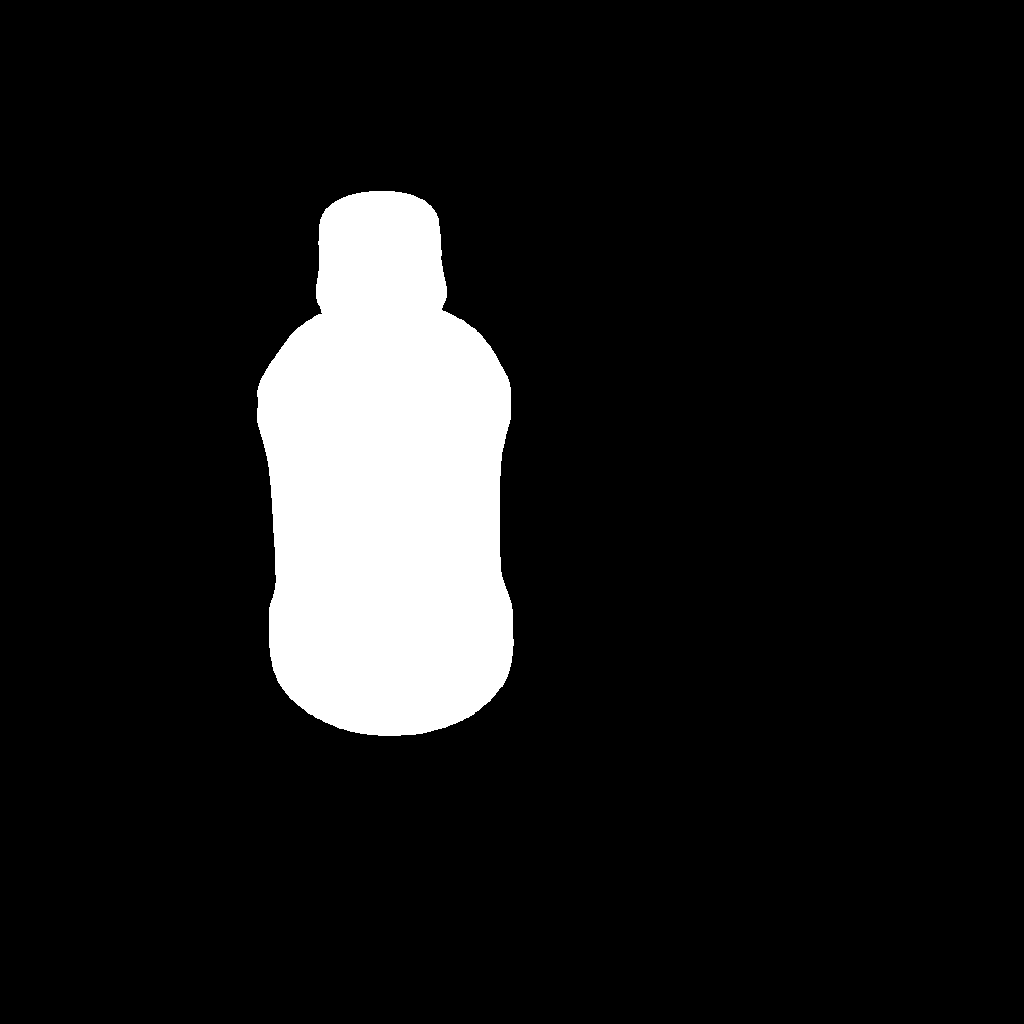

In [8]:
bbox2segment_output.masks[0]

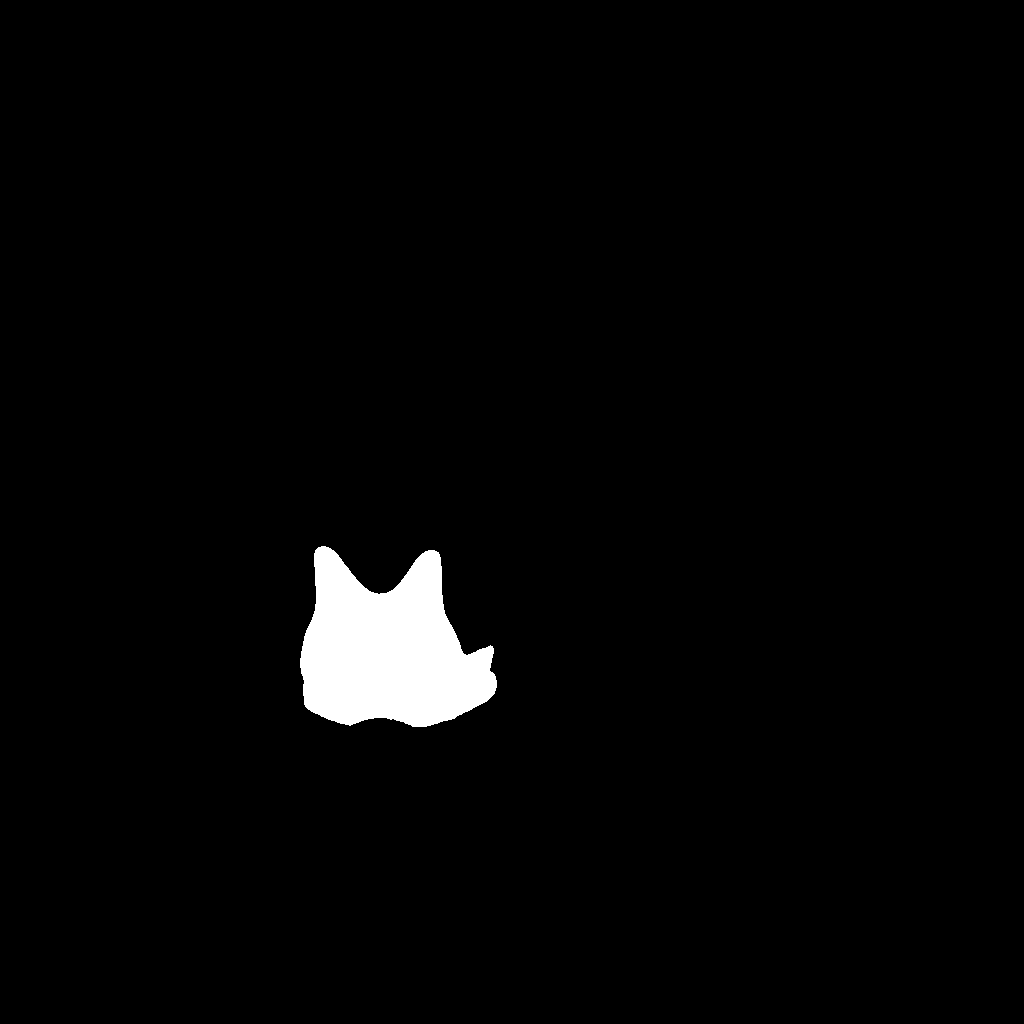

In [9]:
bbox2segment_output.masks[1]